In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import datasets

cancer = datasets.load_breast_cancer()

Classification: linear
Accuracy: 0.9385964912280702
Precision: 0.9848484848484849
Recall: 0.9154929577464789

Classification: poly
Accuracy: 0.9385964912280702
Precision: 0.9444444444444444
Recall: 0.9577464788732394

Classification: rbf
Accuracy: 0.9385964912280702
Precision: 0.9705882352941176
Recall: 0.9295774647887324

Classification: sigmoid
Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465



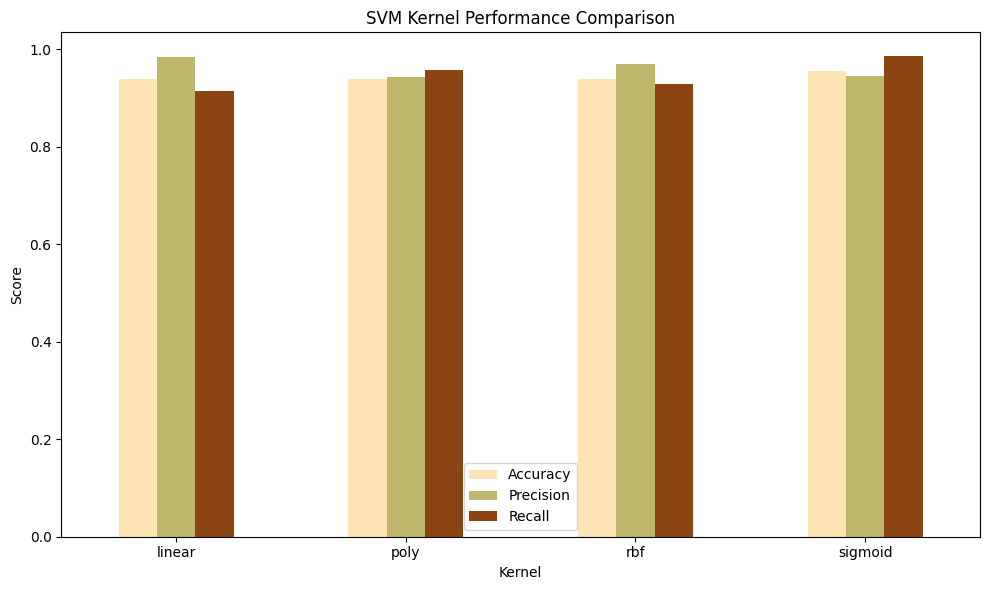

In [31]:
X = cancer.data
Y = cancer.target
TrainX, TestX, TrainY, TestY = train_test_split(X, Y, test_size=0.2, random_state=42)
#Standardization
scaler_std = StandardScaler()
TrainX = scaler_std.fit_transform(TrainX)
TestX = scaler_std.transform(TestX)

#Creating classifier and training each type
ModelL = SVC(kernel='linear', C=1e4)
ModelL.fit(TrainX, TrainY)

ModelP = SVC(kernel='poly', C=1e4)
ModelP.fit(TrainX, TrainY)

ModelR = SVC(kernel='rbf', C=1e4)
ModelR.fit(TrainX, TrainY)

ModelS = SVC(kernel='sigmoid', C=1e4)
ModelS.fit(TrainX, TrainY)

#Predict the models
PredL = ModelL.predict(TestX)
PredP = ModelP.predict(TestX)
PredR = ModelR.predict(TestX)
PredS = ModelS.predict(TestX)
predictions = [PredL, PredP, PredR, PredS]

#Take the test output and run it through the test dataset
results = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i, kernel in enumerate(predictions):
  accuracy = accuracy_score(TestY, kernel)
  precision = precision_score(TestY, kernel)
  recall = recall_score(TestY, kernel)
  results[kernels[i]] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

  print(f"Classification: {kernels[i]}")
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print()

#Bar graph to show the results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10, 6), color =['moccasin', 'darkkhaki', 'saddlebrown'])
plt.title('SVM Kernel Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Kernel')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [32]:
#Problem 2
url= 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
housing = pd.read_csv(url)

inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
vlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in vlist:
    housing[col] = housing[col].map({'yes': 1, 'no': 0})

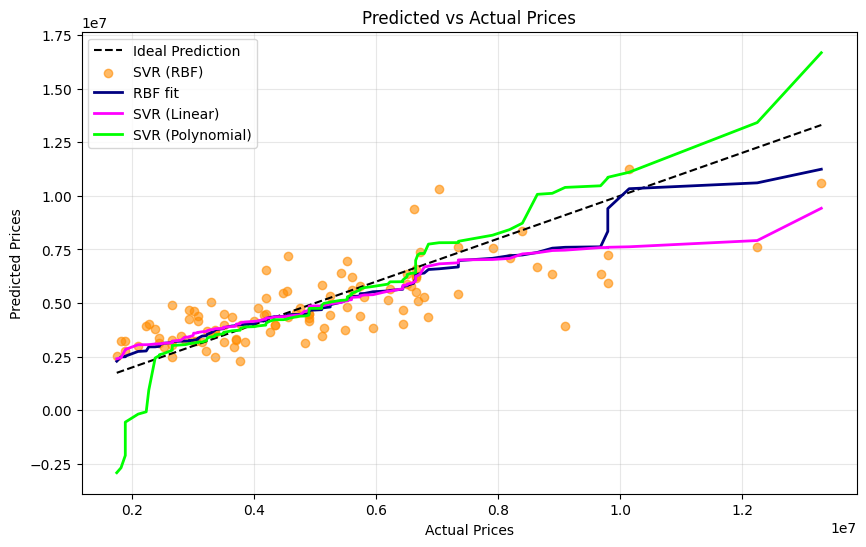

In [34]:
X2 = housing[inputs].values
Y2 = housing.values[:, 0];
TrainX2, TestX2, TrainY2, TestY2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

#Standardization
scalar = StandardScaler()
TrainX2 = scalar.fit_transform(TrainX2)
TestX2 = scalar.transform(TestX2)

#Creating classifier and training for each type
ModelL = SVR(kernel='linear', C=1e8)
ModelL.fit(TrainX2, TrainY2)

ModelP = SVR(kernel='poly', C=1e8)
ModelP.fit(TrainX2, TrainY2)

ModelR = SVR(kernel='rbf', C=1e8)
ModelR.fit(TrainX2, TrainY2)

#Predict the models
PredL_svr = ModelL.predict(TestX2)
PredP_svr = ModelP.predict(TestX2)
PredR_svr = ModelR.predict(TestX2)
svPredRications = [PredL_svr, PredP_svr, PredR_svr]

results_svr = {}
kernels = ['linear', 'poly', 'rbf']
for i, kernel in enumerate(svPredRications):
  rmse = np.sqrt(mean_squared_error(TestY2, kernel))
  r2 = r2_score(TestY2, kernel)

lw = 2
plt.figure(figsize=(10, 6))

#Sorting the price array to plot a more smoothly predicted graph
sorted_idx = np.argsort(TestY2)
TestY2_sorted = TestY2[sorted_idx]

plt.plot([min(TestY2), max(TestY2)], [min(TestY2), max(TestY2)], color='black', linestyle='--', label='Ideal Prediction')
plt.scatter(TestY2, PredR_svr, color='darkorange', label='SVR (RBF)', alpha=0.6)
plt.plot(TestY2_sorted, np.sort(PredR_svr), color='navy', lw=lw, label='RBF fit')
plt.plot(TestY2_sorted, np.sort(PredL_svr), color='magenta', lw=lw, label='SVR (Linear)')
plt.plot(TestY2_sorted, np.sort(PredP_svr), color='lime', lw=lw, label='SVR (Polynomial)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()